Goal: Detection of Malaria disease parasite using  

In [1]:
import tensorflow
print("Tensorflow version is", tensorflow.__version__)

Tensorflow version is 2.8.0


In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
print("importing done successfully")

importing done successfully


In [3]:
# Importing the datasets from the local machine

IMAGE_SIZE = [224,224]
train_path = ("Dataset\Train")
test_path = ("Dataset\Test")

In [4]:
#Importing VGG19 and adding preprocessing layer to the VGG19 model

vgg19 = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
vgg19.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
for layers in vgg19.layers:
    layers.trainable = False

In [6]:
# Checking number of output classes
import glob  
folders = glob.glob('Dataset\Train\*')
folders

['Dataset\\Train\\Parasite', 'Dataset\\Train\\Uninfected']

In [7]:
x = Flatten()(vgg19.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# Creating the object model

model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [9]:
# Compiling the model

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [10]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
training_set = train_datagen.flow_from_directory("Dataset\Train", 
                                                target_size=(224, 224), 
                                                batch_size=32, 
                                                class_mode='categorical')


Found 416 images belonging to 2 classes.


In [12]:
test_set = test_datagen.flow_from_directory("Dataset\Test",
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode='categorical')

Found 134 images belonging to 2 classes.


In [13]:
r = model.fit_generator(training_set, 
                        validation_data=test_set,
                        epochs=100,
                        steps_per_epoch=len(training_set),
                        validation_steps=len(test_set))

C:\Users\anand\AppData\Local\Temp\ipykernel_22432\396017762.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(training_set,


Epoch 1/100
13/13 [==============================] - 66s 5s/step - loss: 1.2787 - accuracy: 0.5096 - val_loss: 0.7374 - val_accuracy: 0.6791
Epoch 2/100
13/13 [==============================] - 53s 4s/step - loss: 0.7686 - accuracy: 0.6490 - val_loss: 0.5940 - val_accuracy: 0.6567
Epoch 3/100
13/13 [==============================] - 56s 4s/step - loss: 0.5448 - accuracy: 0.7380 - val_loss: 1.1203 - val_accuracy: 0.4776
Epoch 4/100
13/13 [==============================] - 63s 5s/step - loss: 0.4310 - accuracy: 0.7885 - val_loss: 0.4512 - val_accuracy: 0.7313
Epoch 5/100
13/13 [==============================] - 62s 5s/step - loss: 0.3281 - accuracy: 0.8654 - val_loss: 0.3726 - val_accuracy: 0.8209
Epoch 6/100
13/13 [==============================] - 61s 5s/step - loss: 0.2701 - accuracy: 0.9087 - val_loss: 0.3719 - val_accuracy: 0.8358
Epoch 7/100
13/13 [==============================] - 62s 5s/step - loss: 0.2454 - accuracy: 0.9231 - val_loss: 0.3341 - val_accuracy: 0.8881
Epoch 8/100
1

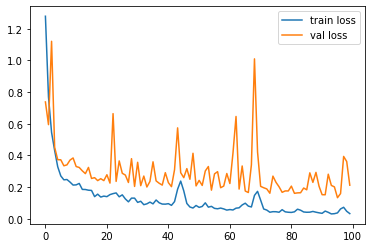

<Figure size 432x288 with 0 Axes>

In [14]:
#Plotting the loss

plt.plot(r.history['loss'], label = 'train loss')
plt.plot(r.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()
plt.savefig("LossVal_loss")

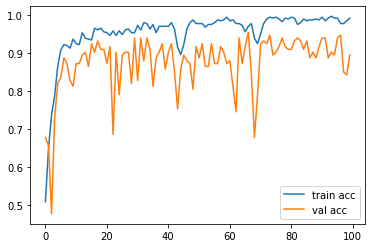

<Figure size 432x288 with 0 Axes>

In [15]:
#Plotting the accuracy

plt.plot(r.history['accuracy'], label = 'train acc')
plt.plot(r.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.show()
plt.savefig("AccVal_loss")

In [16]:
# Saving the model as h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [17]:
y_pred = model.predict(test_set)
y_pred

array([[9.99996901e-01, 3.04602304e-06],
       [8.80284548e-01, 1.19715452e-01],
       [9.99922276e-01, 7.76790112e-05],
       [9.99166250e-01, 8.33808561e-04],
       [9.11639035e-01, 8.83609951e-02],
       [9.99975085e-01, 2.48559772e-05],
       [9.99719679e-01, 2.80277513e-04],
       [1.03422375e-02, 9.89657700e-01],
       [9.99964356e-01, 3.55878983e-05],
       [3.03836018e-01, 6.96163952e-01],
       [9.98156488e-01, 1.84349529e-03],
       [9.11023188e-03, 9.90889728e-01],
       [9.67444301e-01, 3.25556658e-02],
       [9.86009181e-01, 1.39908269e-02],
       [3.64725874e-03, 9.96352792e-01],
       [3.06092888e-01, 6.93907082e-01],
       [1.84602570e-02, 9.81539786e-01],
       [9.16501105e-01, 8.34989250e-02],
       [8.04760993e-01, 1.95239067e-01],
       [6.47508400e-03, 9.93524909e-01],
       [3.80445184e-04, 9.99619484e-01],
       [1.18155871e-02, 9.88184452e-01],
       [3.52785946e-03, 9.96472120e-01],
       [1.08495904e-02, 9.89150465e-01],
       [1.008965

In [18]:
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1], dtype=int64)

In [19]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [20]:
model = load_model('model_vgg19.h5')

In [21]:
# Loading the test data from the local machine

dir_path = 'Dataset\Testing_Sample'

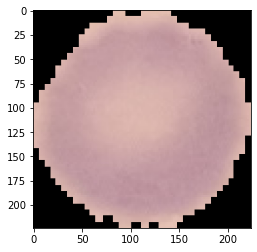

The person is infected with the Malaria parasite


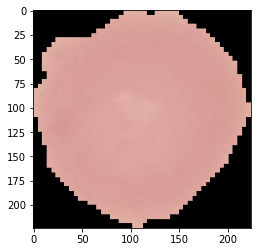

The person is infected with the Malaria parasite


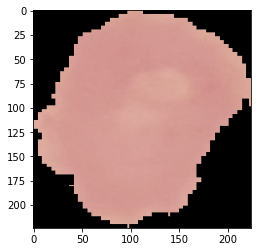

The person is infected with the Malaria parasite


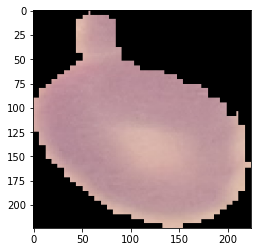

The person is infected with the Malaria parasite


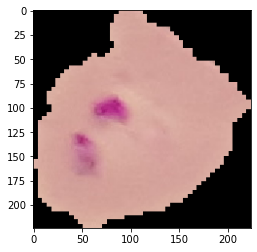

The person is infected with the Malaria parasite


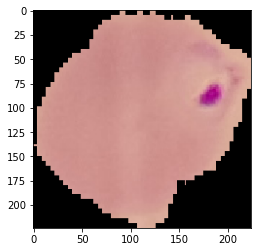

The person is infected with the Malaria parasite


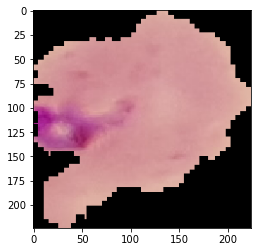

The person is infected with the Malaria parasite


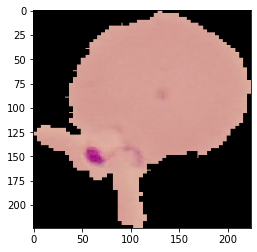

The person is infected with the Malaria parasite


In [24]:
for i in os.listdir(dir_path):
    test_images = len(os.listdir(dir_path))
    img = image.load_img(dir_path + '\\' + i, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    
# Converting the image to a numpy array   

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    
# Loading the model  

    classes = model.predict(images)
    classes = np.argmax(classes, axis=1)
    
# Printing the results   

    if classes == 1:
        print("The person is not infected with the Malaraia parasite")
    else:
        print("The person is infected with the Malaria parasite")